In [1]:
from bs4 import BeautifulSoup
import requests
import re
import os
import pandas as pd
import numpy as np

In [5]:
os.chdir('C:/Users/KRX/code/dataset/raw_data/news/')

파일 열기

In [6]:
raw_df = pd.read_csv('sentiment/test_graph.csv', encoding='utf-8-sig')
raw_df = raw_df.set_index('date')
raw_df = raw_df.sort_values('date', ascending=True) # weight 기준으로 오름차순으로 정렬. 몸무게가 적은 순으로 정렬

날짜 범위 선택

In [7]:
sample_df = raw_df[(raw_df.index > '2016-01-01') & (raw_df.index <= '2016-01-31')]

In [8]:
date = sample_df.index.tolist() 
wti = sample_df['wti_price']
sent = sample_df['total_sentiment']

In [9]:
def recalculate_sent(sent):
    new_sent = [] 
    for each in sent: 
        each = (each * 100) + 40
        new_sent.append('{:.2f}'.format(each))      

    return new_sent

Oil Price의 Trend 제거 

In [15]:
def detrend_wti(wti):
    detrended_wti = []
    for i in range(0,len(wti)): 
        if i > 0: 
            diff = float(wti[i]) - float(wti[i-1]) 
            detrended_wti.append('{:.2f}'.format(diff))
         
        else: 
            detrended_wti.append(0)

    return detrended_wti

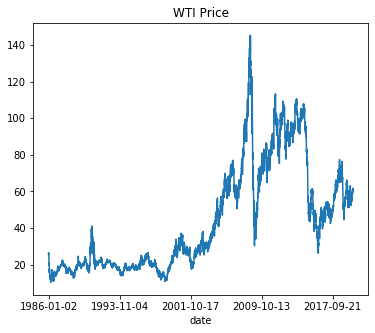

In [14]:
#Trend가 제거되지 않았을 때 

sample_df = raw_df[(raw_df.index > '1986-01-01') & (raw_df.index <= '2019-12-31')]
wti = sample_df['wti_price']
plt.figure(figsize=(6,5))                                                   
wti.plot(kind='line')
plt.title('WTI Price')
plt.show() 

테이블 생성

In [11]:
def create_table(): 
    new_df = pd.DataFrame({'date': date, 'detrend_wti':detrend_wti(wti),
                       'sent':recalculate_sent(sent)}, dtype=float)                          
    new_df = new_df.set_index('date')
    
    return new_df 

new_df = create_table() 

그래프 그리기

<Figure size 432x288 with 0 Axes>

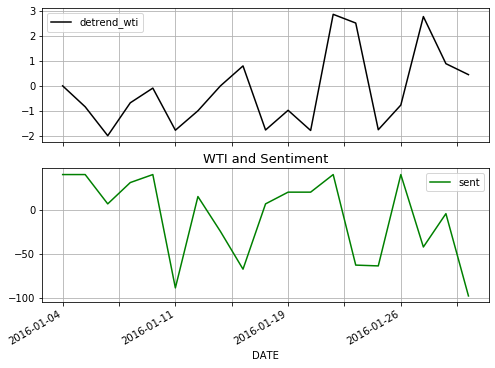

In [16]:
def create_graph(new_df):  
    from matplotlib import pyplot as plt 
    
    plt.figure()                                                   
    new_df.plot(kind='line', grid=True, subplots=True, figsize=(8,6), color=['k','g'])
    plt.title('WTI and Sentiment', fontsize=13)
    plt.xlabel('DATE')
    plt.show() 
    
    return plt 


plt = create_graph(new_df)